In [1]:
import pandas as pd
train_df = pd.read_excel("..\Preprocessing\df_train_fix.xlsx")
test_df = pd.read_excel("..\Preprocessing\df_test_fix.xlsx")


In [2]:
test_df = test_df[test_df['translated'].notna()]
test_df = test_df[test_df['Label (1,0,-1)'].notna()]
test_df

,Unnamed: 0,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji,Data,tokenized,length_of_review,translated
0,0,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌 #BRIm...,BRI,Instagram,1,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,has emoji,jawabannya logo brimo yang muncul [smiling fac...,"['jawabannya', 'logo', 'brimo', 'yang', 'muncu...",12,jawabannya logo brimo yang muncul wajah terse...
1,1,@sudrajaddwntr @alibyulian @neidijrssyh @dhemm...,BCA,Instagram,1,.j siap siap war tiket pasang reminders dr ...,.j siap siap war tiket pasang reminders dari s...,has emoji,siap siap war tiket pasang reminders dari sek...,"['siap', 'siap', 'war', 'tiket', 'pasang', 're...",20,siap siap perang tiket pasang pengingat dari ...
2,2,Lancar dan lancar semoga bukan cerita lagi,BCA,YouTube,1,Lancar dan lancar semoga bukan cerita lagi,Lancar dan lancar semoga bukan cerita lagi,no emoji,lancar dan lancar semoga bukan cerita lagi,"['lancar', 'dan', 'lancar', 'semoga', 'bukan',...",7,lancar dan lancar semoga bukan cerita lagi
3,3,Bismillaaaaah,BCA,Instagram,1,Bismillaaaaah,Bismillaaaaah,no emoji,bismillaaaaah,['bismillaaaaah'],1,bismillaaaaah
4,4,@JeniusConnect Paypal bisa gak?,Bank BTPN,Instagram,0,Paypal bisa gak?,Paypal bisa gak?,no emoji,paypal bisa gak,"['paypal', 'bisa', 'gak']",3,paypal bisa gak
...,...,...,...,...,...,...,...,...,...,...,...,...
8341,8341,@JeniusConnect @jeniushelp Unlinknya dipercepa...,Bank BTPN,Instagram,0,Unlinknya dipercepat dong,Unlinknya dipercepat dong,no emoji,unlinknya dipercepat dong,"['unlinknya', 'dipercepat', 'dong']",3,unlinknya dipercepat dong
8342,8342,Kalo bca prioritas dpt fasilitas apa nih😁,BCA,Instagram,1,Kalo bca prioritas dpt fasilitas apa nih😁,Kalo bca prioritas dapat fasilitas apa nih😁,has emoji,kalo bca prioritas dapat fasilitas apa nih [be...,"['kalo', 'bca', 'prioritas', 'dapat', 'fasilit...",12,kalo bca prioritas dapat fasilitas apa nih wa...
8343,8343,GILA SIHHH AYAANG AKUUU😍😍,Allo Bank,Instagram,1,GILA SIHHH AYAANG AKUUU😍😍,GILA SIHHH AYAANG AKUUU😍😍,no emoji,gila sihhh ayaang akuuu [smiling face with hea...,"['gila', 'sihhh', 'ayaang', 'akuuu', '[smiling...",14,gila sihhh ayaang akuuu wajah tersenyum denga...
8344,8344,SEMANGATTTTTT!!!!,Bank Mega,Twitter,1,SEMANGATTTTTT!!!!,SEMANGATTTTTT!!!!,no emoji,semangatttttt,['semangatttttt'],1,semangatttttt


In [3]:
combined_df = pd.concat([train_df, test_df])

# Reset the index if needed
combined_df.reset_index(drop=True, inplace=True)

In [4]:
combined_df = combined_df.dropna(subset=['translated'])
combined_df.reset_index(drop=True,inplace=True)

In [5]:
from nltk.corpus import stopwords
additional_stop = ['nya','yg','ga','gk','tp','nih','noh','lah','dong','pa','yuk','gak','ya','sih','yaa','aja', 'min', 'bca','brimo','biar','kak','blu','mega','allo','bank','bca','btn']
all_stopwords = stopwords.words('indonesian') + additional_stop

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X=combined_df['translated']
y=combined_df['Label (1,0,-1)']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.20,random_state=30)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
training_ratings = le.fit_transform(y_train)
val_ratings = le.transform(y_test)

In [9]:
val_ratings

array([1, 2, 0, ..., 2, 2, 1], dtype=int64)

In [10]:
vocab_size = 10000
embedding_dim = 64
max_length = 15
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [12]:
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'wajah': 2,
 'dengan': 3,
 'bank': 4,
 'hati': 5,
 'dan': 6,
 'tidak': 7,
 'yang': 8,
 'mata': 9,
 'ada': 10}

In [13]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[10])

[177, 39, 261, 31, 192, 2207, 526, 192, 48, 1759, 65, 7, 210, 286, 93, 59, 771, 526, 83, 26, 86, 248, 6, 418]


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

2
15
17
15
24
15


In [15]:
validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

8295
(8295, 15)


In [16]:
import numpy as np
training_label_seq = np.array(y_train)
validation_label_seq = np.array(y_test)

In [17]:
np.shape(X_train)

(33176,)

In [18]:
from tensorflow import keras
import tensorflow as tf

def baseline_model():
  input_ = keras.layers.Input(1)
  embedding = keras.layers.Embedding(vocab_size, embedding_dim)(input_)
  bidirectional = keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim))(embedding)
  hidden1 = keras.layers.Dense(embedding_dim, activation='relu')(bidirectional)
  output = keras.layers.Dense(3, activation='softmax')(hidden1)
  model = keras.models.Model(inputs=[input_], outputs=[output])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [19]:
baseline_model = baseline_model()
baseline_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding (Embedding)       (None, 1, 64)             640000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 714499 (2.73 MB)
Trainable params: 714499 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________

In [20]:
num_epochs = 10
history = baseline_model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=128)

Epoch 1/10
260/260 [==============================] - 10s 22ms/step - loss: 0.6687 - accuracy: 0.6977 - val_loss: 0.5669 - val_accuracy: 0.7537
Epoch 2/10
260/260 [==============================] - 5s 18ms/step - loss: 0.4897 - accuracy: 0.7931 - val_loss: 0.5593 - val_accuracy: 0.7612
Epoch 3/10
260/260 [==============================] - 5s 18ms/step - loss: 0.4225 - accuracy: 0.8242 - val_loss: 0.5753 - val_accuracy: 0.7621
Epoch 4/10
260/260 [==============================] - 5s 18ms/step - loss: 0.3726 - accuracy: 0.8485 - val_loss: 0.6511 - val_accuracy: 0.7521
Epoch 5/10
260/260 [==============================] - 5s 19ms/step - loss: 0.3330 - accuracy: 0.8632 - val_loss: 0.6543 - val_accuracy: 0.7491
Epoch 6/10
260/260 [==============================] - 5s 19ms/step - loss: 0.2970 - accuracy: 0.8757 - val_loss: 0.7307 - val_accuracy: 0.7431
Epoch 7/10
260/260 [==============================] - 5s 18ms/step - loss: 0.2661 - accuracy: 0.8890 - val_loss: 0.8014 - val_accuracy: 0.745

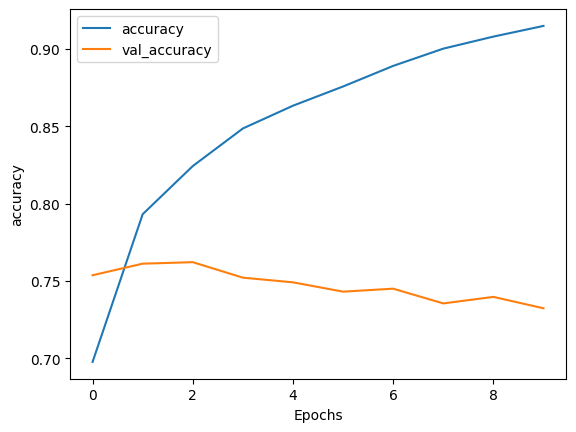

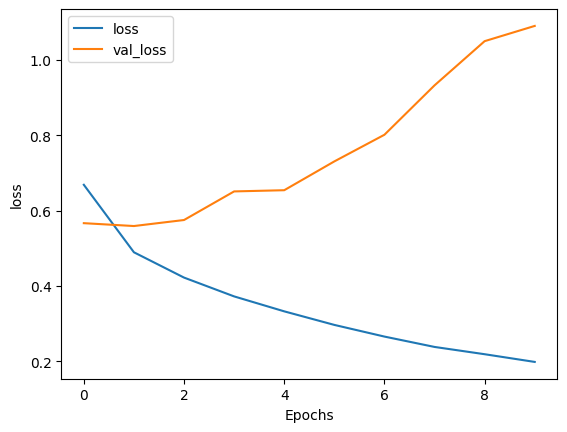

In [21]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
import tensorflow as tf
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(128, embedding_dim, input_length=max_length, mask_zero=True),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
  tf.keras.layers.Dense(16,kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),bias_regularizer = tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.LeakyReLU(alpha=0.3),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(16, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                        bias_regularizer  = tf.keras.regularizers.l2(0.01),
                        activation='elu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(8, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                        activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
  ])


opt = tf.keras.optimizers.Nadam(lr=0.0001, clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
import tensorflow as tf
vocab_size = 10000
embedding_dim = 64
max_length = 15
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, mask_zero=True),  # Updated vocab_size
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
  tf.keras.layers.Dense(16, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.1), bias_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.LeakyReLU(alpha=0.3),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(16, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.1),
                        bias_regularizer=tf.keras.regularizers.l2(0.01),
                        activation='elu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(8, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.1),
                        activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])
opt = tf.keras.optimizers.Nadam(lr=0.0001, clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
checkpoint_filepath = './checkpoint_model'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=100, callbacks=[callback, reduce_lr, model_checkpoint])

Epoch 1/30


332/332 [==============================] - 31s 43ms/step - loss: 4.5309 - accuracy: 0.6808 - val_loss: 2.2991 - val_accuracy: 0.5640 - lr: 0.0010
Epoch 2/30
332/332 [==============================] - 10s 29ms/step - loss: 1.2460 - accuracy: 0.7777 - val_loss: 0.9207 - val_accuracy: 0.7149 - lr: 0.0010
Epoch 3/30
332/332 [==============================] - 10s 29ms/step - loss: 0.6105 - accuracy: 0.8158 - val_loss: 0.6506 - val_accuracy: 0.7466 - lr: 0.0010
Epoch 4/30
332/332 [==============================] - 10s 29ms/step - loss: 0.4533 - accuracy: 0.8436 - val_loss: 0.6506 - val_accuracy: 0.7362 - lr: 0.0010
Epoch 5/30
332/332 [==============================] - 10s 29ms/step - loss: 0.3933 - accuracy: 0.8652 - val_loss: 0.7290 - val_accuracy: 0.7478 - lr: 0.0010
Epoch 5: early stopping


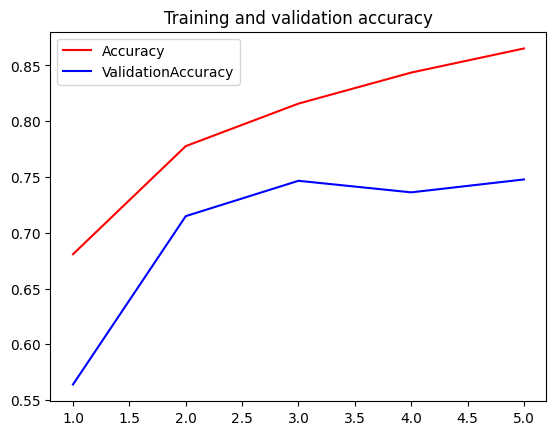

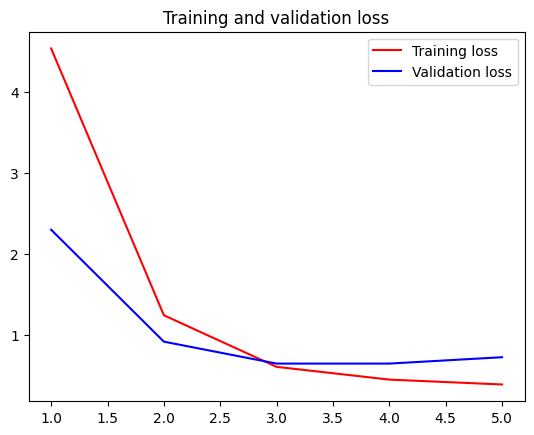

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Accuracy')
plt.plot(epochs, val_acc, 'blue', label='ValidationAccuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()